In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Using pandas Series allows you to create indexed lists or arrays shown below.

In [ ]:
obj = Series([3,6,9,12])

In [4]:
obj

0     3
1     6
2     9
3    12
dtype: int64

A Series kind of looks like a column of a spreadsheet.  Using values method like we did for dictionaries allows all of the same functionality in a Series.

In [5]:
obj.values

array([ 3,  6,  9, 12], dtype=int64)

In [6]:
obj.index

RangeIndex(start=0, stop=4, step=1)

We can also create our own indexes for the lists / arrays along with them as shown below

In [7]:
ww2_cas = Series([8700000, 4300000,3000000,2100000, 400000],index= ['USSR','Germany','China','Japan','USA'])

In [8]:
ww2_cas

USSR       8700000
Germany    4300000
China      3000000
Japan      2100000
USA         400000
dtype: int64

We can then search by index and by value

In [9]:
ww2_cas['USA']

400000

In [10]:
#Check for conutries with casualties > 4 mill
ww2_cas[ww2_cas > 4000000]

USSR       8700000
Germany    4300000
dtype: int64

In [11]:
'USSR' in ww2_cas

True

We can easily change a Series to a dictionary as shown below

In [12]:
ww2_dict = ww2_cas.to_dict()

In [13]:
ww2_dict

{'USSR': 8700000,
 'Germany': 4300000,
 'China': 3000000,
 'Japan': 2100000,
 'USA': 400000}

In [14]:
ww2_series = Series(ww2_dict)

In [15]:
ww2_series

USSR       8700000
Germany    4300000
China      3000000
Japan      2100000
USA         400000
dtype: int64

And we can create new Series from dictionaries indexed with variables that contain whatever we want as shown below

In [16]:
countries = ['China', 'Germany', 'Japan']

In [17]:
obj2 = Series(ww2_dict, index=countries)

In [19]:
obj2

China      3000000
Germany    4300000
Japan      2100000
dtype: int64

We can also check for null values using pandas methods like isnull or notnull.

In [20]:
pd.isnull(obj2)

China      False
Germany    False
Japan      False
dtype: bool

In [21]:
pd.notnull(obj2)

China      True
Germany    True
Japan      True
dtype: bool

In [22]:
ww2_series + obj2

China      6000000.0
Germany    8600000.0
Japan      4200000.0
USA              NaN
USSR             NaN
dtype: float64

In [23]:
obj2.name = 'World War 2 Casualties'

In [24]:
obj2

China      3000000
Germany    4300000
Japan      2100000
Name: World War 2 Casualties, dtype: int64

In [25]:
obj2.index.name = 'Countries'

In [26]:
obj2

Countries
China      3000000
Germany    4300000
Japan      2100000
Name: World War 2 Casualties, dtype: int64

Data frames are like a spreadsheet in pandas.  It seems much easier to use than numpy's arrays and matrices, but there aren't any mathematical functions available for it.

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [4]:
import webbrowser
website = 'https://en.wikipedia.org/wiki/NFL_win-loss_records'
webbrowser.open(website)

True

With pandas data frames you can literally use python's built in webbrowser function to pull up a webpage to pull data to create your data frame.  You just copy any table to your clipboard and use the pd.read_clipboard() statement to capture.  Below I captured the nfl wins losses just like taking a snippet.  Very cool!.  

In [5]:
nfl_frame = pd.read_clipboard()

In [6]:
nfl_frame

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL Season,Division
0,1,Dallas Cowboys,914,520,388,6,0.572,1960,NFC East
1,2,Green Bay Packers,"1,368",756,574,38,0.567,1921,NFC North
2,3,New England Patriots,916,512,395,9,0.564,1960,AFC East
3,4,Chicago Bears,"1,402",769,591,42,0.563,1920,NFC North
4,5,Baltimore Ravens,384,214,169,1,0.559,1996,AFC North


Then you can pull out different values by using the many .methods available including any of the headings as long as they are one word.

In [7]:
nfl_frame.columns

Index(['Rank', 'Team', 'GP', 'Won', 'Lost', 'Tied', 'Pct.', 'First NFL Season',
       'Division'],
      dtype='object')

In [9]:
nfl_frame.Team

0          Dallas Cowboys
1       Green Bay Packers
2    New England Patriots
3           Chicago Bears
4        Baltimore Ravens
Name: Team, dtype: object

If there are two words in the heading then use the index method  with the exact name in quotes.  Verify by calling with the columns method first.

In [10]:
nfl_frame['First NFL Season']

0    1960
1    1921
2    1960
3    1920
4    1996
Name: First NFL Season, dtype: int64

To call multiple columns use the DataFrame() function and pass the name of the data frame you want to use along with a list of columns you want by name in quotes as shown below.

In [12]:
DataFrame(nfl_frame, columns=['Team','First NFL Season'])

,Team,First NFL Season
0,Dallas Cowboys,1960
1,Green Bay Packers,1921
2,New England Patriots,1960
3,Chicago Bears,1920
4,Baltimore Ravens,1996


Here is how we pull rows.

In [14]:
nfl_frame.head()# to see what you have and you can pass a number to pull more or fewer rows

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL Season,Division
0,1,Dallas Cowboys,914,520,388,6,0.572,1960,NFC East
1,2,Green Bay Packers,"1,368",756,574,38,0.567,1921,NFC North
2,3,New England Patriots,916,512,395,9,0.564,1960,AFC East
3,4,Chicago Bears,"1,402",769,591,42,0.563,1920,NFC North
4,5,Baltimore Ravens,384,214,169,1,0.559,1996,AFC North


In my class, the instructor uses the .ix method, but this method was deprecated in pandas 0.20.1 in 2016 I think.  I had to use loc or iloc instead.  I found loc to be very similar at least superficially and the exact structure of the instructors code worked with loc instead of ix.

In [18]:
nfl_frame.loc[3]

Rank                            4
Team                Chicago Bears
GP                          1,402
Won                           769
Lost                          591
Tied                           42
Pct.                        0.563
First NFL Season             1920
Division                NFC North
Name: 3, dtype: object

In [19]:
nfl_frame['Stadium'] = "Levi's Stadium"

In [20]:
nfl_frame

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL Season,Division,Stadium
0,1,Dallas Cowboys,914,520,388,6,0.572,1960,NFC East,Levi's Stadium
1,2,Green Bay Packers,"1,368",756,574,38,0.567,1921,NFC North,Levi's Stadium
2,3,New England Patriots,916,512,395,9,0.564,1960,AFC East,Levi's Stadium
3,4,Chicago Bears,"1,402",769,591,42,0.563,1920,NFC North,Levi's Stadium
4,5,Baltimore Ravens,384,214,169,1,0.559,1996,AFC North,Levi's Stadium


In [21]:
nfl_frame['Stadium'] = np.arange(5)

In [22]:
nfl_frame

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL Season,Division,Stadium
0,1,Dallas Cowboys,914,520,388,6,0.572,1960,NFC East,0
1,2,Green Bay Packers,"1,368",756,574,38,0.567,1921,NFC North,1
2,3,New England Patriots,916,512,395,9,0.564,1960,AFC East,2
3,4,Chicago Bears,"1,402",769,591,42,0.563,1920,NFC North,3
4,5,Baltimore Ravens,384,214,169,1,0.559,1996,AFC North,4


We can even add a Series as shown below

In [23]:
stadiums =  Series(["Levi's Stadium", ' AT&T Stadium'], index = [4,0])

In [24]:
stadiums

4    Levi's Stadium
0      AT&T Stadium
dtype: object

In [25]:
nfl_frame ['Stadium'] = stadiums

In [26]:
nfl_frame

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL Season,Division,Stadium
0,1,Dallas Cowboys,914,520,388,6,0.572,1960,NFC East,AT&T Stadium
1,2,Green Bay Packers,"1,368",756,574,38,0.567,1921,NFC North,NaN
2,3,New England Patriots,916,512,395,9,0.564,1960,AFC East,NaN
3,4,Chicago Bears,"1,402",769,591,42,0.563,1920,NFC North,NaN
4,5,Baltimore Ravens,384,214,169,1,0.559,1996,AFC North,Levi's Stadium


We can delete by using del as shown below

In [27]:
del nfl_frame['Stadium']

In [28]:
nfl_frame

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL Season,Division
0,1,Dallas Cowboys,914,520,388,6,0.572,1960,NFC East
1,2,Green Bay Packers,"1,368",756,574,38,0.567,1921,NFC North
2,3,New England Patriots,916,512,395,9,0.564,1960,AFC East
3,4,Chicago Bears,"1,402",769,591,42,0.563,1920,NFC North
4,5,Baltimore Ravens,384,214,169,1,0.559,1996,AFC North


You can also create data frames by passing in a dictionary

In [29]:
data = {'City': ['SF', 'LA', 'NYC'], 'Population': [837000, 3880000, 8400000]}

In [30]:
city_frame = DataFrame(data)

In [31]:
city_frame

,City,Population
0,SF,837000
1,LA,3880000
2,NYC,8400000


index objects - 

In [33]:
my_ser = Series([1,2,3,4], index= ['A', 'B', 'C', 'D'])

In [34]:
my_ser

A    1
B    2
C    3
D    4
dtype: int64

In [35]:
my_index = my_ser.index

In [36]:
my_index

Index(['A', 'B', 'C', 'D'], dtype='object')

In [37]:
my_index[3]

'D'

In [38]:
my_index[2:]

Index(['C', 'D'], dtype='object')

Indexes are immutable but you can reindex

In [39]:
from numpy.random import randn

In [40]:
ser1 = my_ser

In [41]:
ser1

A    1
B    2
C    3
D    4
dtype: int64

In [44]:
ser2 = ser1.reindex(['A', 'B', 'C', 'D', 'E'])

In [45]:
ser2

A    1.0
B    2.0
C    3.0
D    4.0
E    NaN
dtype: float64

In [46]:
ser2.reindex(['A','B','C','D','E','F','G'],fill_value=0)

A    1.0
B    2.0
C    3.0
D    4.0
E    NaN
F    0.0
G    0.0
dtype: float64

In [47]:
ser3 = Series(['USA', 'Mexico'], index = [0,5])

In [48]:
ser3

0       USA
5    Mexico
dtype: object

ffill extends the value to the next index change.

In [52]:
ser3.reindex(range(15), method ='ffill')  

0        USA
1        USA
2        USA
3        USA
4        USA
5     Mexico
6     Mexico
7     Mexico
8     Mexico
9     Mexico
10    Mexico
11    Mexico
12    Mexico
13    Mexico
14    Mexico
dtype: object

In [56]:
dframe = DataFrame(randn(4).reshape((2,2)),index=['A','B'],columns=['col1','col2'])

In [57]:
dframe

,col1,col2
A,1.584550,-1.350608
B,-0.000027,-0.961763


In [58]:
dframe2 = dframe.reindex(['B','C'])

In [59]:
dframe2

,col1,col2
B,-0.000027,-0.961763
C,NaN,NaN


drop entry

In [60]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

In [61]:
ser1 = Series(np.arange(3), index=['a','b','c'])

In [62]:
ser1

a    0
b    1
c    2
dtype: int32

In [63]:
ser1.drop('b')

a    0
c    2
dtype: int32

In [64]:
dframe1= DataFrame(np.arange(9).reshape((3,3)), index=['SF', 'LA', 'NY'])

In [65]:
dframe1

,0,1,2
SF,0,1,2
LA,3,4,5
NY,6,7,8


In [66]:
dframe1.drop('LA')

,0,1,2
SF,0,1,2
NY,6,7,8


In [67]:
dframe1

,0,1,2
SF,0,1,2
LA,3,4,5
NY,6,7,8


In [71]:
dframe1.drop(1, axis=1)# the axis is needed to drop the column and the 1 axis is the first one

,0,2
SF,0,2
LA,3,5
NY,6,8


In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [4]:
ser1 = Series(np.arange(3), index=['a','b','c'])
ser1 = ser1*2

In [5]:
ser1

a    0
b    2
c    4
dtype: int32

In [6]:
ser1['b']

2

In [7]:
ser1[1]

2

In [8]:
ser1[ser1>3]

c    4
dtype: int32

In [9]:
ser1[ser1>3] = 7

In [10]:
ser1

a    0
b    2
c    7
dtype: int32

In [16]:
dframe=DataFrame(np.arange(9).reshape((3,3)), index=['NYC', 'LA', 'SF'],
                columns = ['a','b','c'])

In [17]:
dframe

,a,b,c
NYC,0,1,2
LA,3,4,5
SF,6,7,8


In [18]:
dframe['b']

NYC    1
LA     4
SF     7
Name: b, dtype: int32

Note that you must use two sets of brackets if calling a list of indexed items (one set of brackets for list and one for index).

In [20]:
dframe[['b','c']]

,b,c
NYC,1,2
LA,4,5
SF,7,8


In [21]:
dframe[dframe['b']>4]

,a,b,c
SF,6,7,8


In [23]:
dframe > 4

,a,b,c
NYC,False,False,False
LA,False,False,True
SF,True,True,True


In [24]:
dframe.loc['LA']

a    3
b    4
c    5
Name: LA, dtype: int32

In [27]:
dframe.iloc[1]

a    3
b    4
c    5
Name: LA, dtype: int32

Data alignment  - arithmatic between data frames with different index values

In [28]:
ser1

a    0
b    2
c    7
dtype: int32

In [39]:
ser2 = Series([2,3,4,5],index=['c','d','e','f'])

In [40]:
ser2

c    2
d    3
e    4
f    5
dtype: int64

In [41]:
ser1+ser2

a    NaN
b    NaN
c    9.0
d    NaN
e    NaN
f    NaN
dtype: float64

In [45]:
dframe1=DataFrame(np.arange(4).reshape((2,2)),columns=list('AB'),index=['NYC', 'LA'])

In [46]:
dframe1

,A,B
NYC,0,1
LA,2,3


In [50]:
dframe2 = DataFrame(np.arange(9).reshape((3,3)),columns=list('ADC'),index=['NYC', 'SF', 'LA']) 
dframe2

,A,D,C
NYC,0,1,2
SF,3,4,5
LA,6,7,8


In [51]:
dframe1+dframe2

,A,B,C,D
LA,8.0,NaN,NaN,NaN
NYC,0.0,NaN,NaN,NaN
SF,NaN,NaN,NaN,NaN


In [52]:
dframe1.add(dframe2,fill_value=0)

,A,B,C,D
LA,8.0,3.0,8.0,7.0
NYC,0.0,1.0,2.0,1.0
SF,3.0,NaN,5.0,4.0


rank and sort 

In [53]:
ser1

a    0
b    2
c    7
dtype: int32

In [54]:
ser1.sort_index()

a    0
b    2
c    7
dtype: int32

The instructor had us use the dot method order and it threw and error on me.  I guess this class is so old that the versions have overtaken the instruction.  I looked it up and the sort_values has replaced .order.  I am still learning at a low cost and I know nothing so anything is valuable.  Still, I can't help but feel I could have found and purchased a better starting point.  I must meditate on this later.  I will continue to learn for now.

In [56]:
ser1.sort_values()

a    0
b    2
c    7
dtype: int32

In [57]:
from numpy.random import randn

In [58]:
ser2 = Series(randn(10))

In [59]:
ser2

0   -1.159894
1    2.678320
2    0.446313
3    0.500820
4   -0.382319
5   -0.748665
6    0.275536
7   -0.580193
8    1.864225
9    0.428918
dtype: float64

The instructor asked us to use a .sort method that threw me and error.  The sort_value dot method is what I needed for today's version.  NOw I know why this class was so cheap :)

In [67]:
ser2.sort_values()

0   -1.159894
5   -0.748665
7   -0.580193
4   -0.382319
6    0.275536
9    0.428918
2    0.446313
3    0.500820
8    1.864225
1    2.678320
dtype: float64

Rank method also did not work as the instructor explained.

In [68]:
ser2.rank()

0     1.0
1    10.0
2     7.0
3     8.0
4     4.0
5     2.0
6     5.0
7     3.0
8     9.0
9     6.0
dtype: float64

summary statistics - numpy dataframe statistical summaries

In [69]:
arr = np.array([[1,2,np.nan],[np.nan,3,4]])

In [71]:
dframe1 = DataFrame(arr,index=['A','B'],columns=['One', 'Two', 'Three'])

In [72]:
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [73]:
dframe1.sum()

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [74]:
dframe1.sum(axis=1)

A    3.0
B    7.0
dtype: float64

In [79]:
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [76]:
dframe1.min()

One      1.0
Two      2.0
Three    4.0
dtype: float64

In [78]:
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [77]:
dframe1.idxmin()

One      A
Two      A
Three    B
dtype: object

In [81]:
dframe1.cumsum()

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,5.0,4.0


In [82]:
dframe1.describe()

,One,Two,Three
count,1.0,2.000000,1.0
mean,1.0,2.500000,4.0
std,NaN,0.707107,NaN
min,1.0,2.000000,4.0
25%,1.0,2.250000,4.0
50%,1.0,2.500000,4.0
75%,1.0,2.750000,4.0
max,1.0,3.000000,4.0


In [84]:
from IPython.display import YouTubeVideo

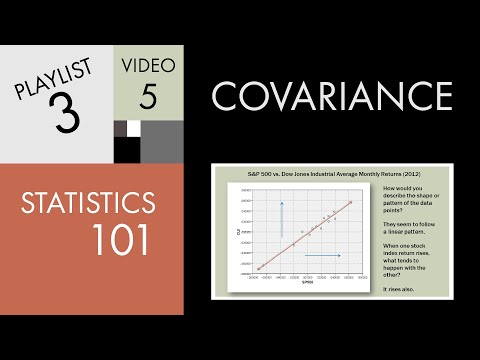

In [85]:
YouTubeVideo('xGbpuFNR1ME')

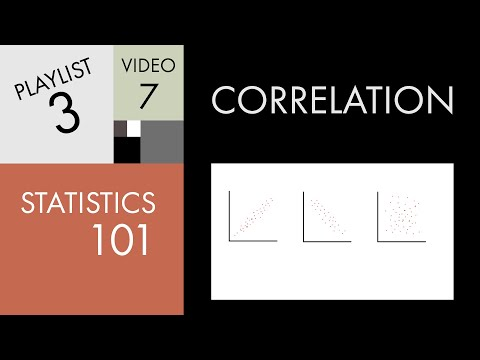

In [86]:
YouTubeVideo('4EXNedimDMs')

In [90]:
from pandas_datareader import data as pdweb
import datetime


C:\Users\fitmi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [92]:
prices = pdweb.get_data_yahoo(['CVX','XOM','BP'],start=datetime.datetime(2010,1,1),end=datetime.datetime(2013,1,1))['Adj Close']
prices.head()

Symbols,CVX,XOM,BP
Date,,,
2010-01-04,53.826290,49.342556,34.588184
2010-01-05,54.207569,49.535217,34.833763
2010-01-06,54.214378,49.963345,35.015053
2010-01-07,54.010117,49.806370,35.003349
2010-01-08,54.105431,49.606567,35.085209


In [97]:
rets = prices.pct_change()

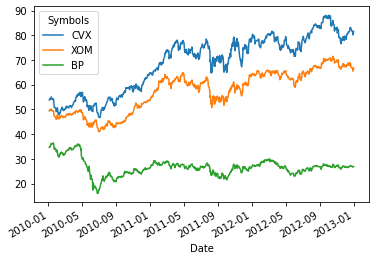

In [99]:
corr = rets.corr
%matplotlib inline
prices.plot()

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

Another case in which the instructor used sns.corrplot(rets,annot=False,diag_names = False) and this was depricated long ago in favor of heatmap.  Heatmap does not take all of the same arguments and it took me a bit to find the info.  I've learned that heatmaps rated poorly on a study about human understanding of graphs.  Scatterplots and bar charts were the best.

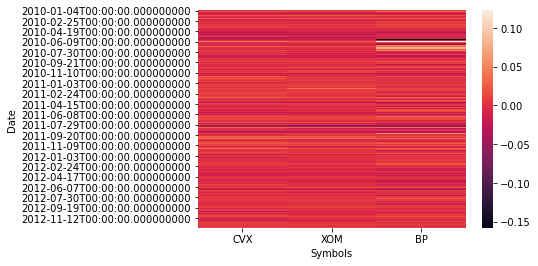

In [106]:
sns.heatmap(rets,annot=False)

In [107]:
ser7 = Series(['w','x','g','h','x','f','r','e','q','g','w'])

In [108]:
ser7


0     w
1     x
2     g
3     h
4     x
5     f
6     r
7     e
8     q
9     g
10    w
dtype: object

In [109]:
ser7.unique()

array(['w', 'x', 'g', 'h', 'f', 'r', 'e', 'q'], dtype=object)

In [110]:
ser7.value_counts()

x    2
w    2
g    2
q    1
r    1
e    1
f    1
h    1
dtype: int64

Missing data - how to

In [111]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

In [112]:
data=Series(['one','two',np.nan,'four'])
data

0     one
1     two
2     NaN
3    four
dtype: object

We can see if we have nulls in our data by using .isnull to return a boolean as shown below.

In [113]:
data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

We can also use .dropna() to remove the null in our Series

In [115]:
data.dropna()

0     one
1     two
3    four
dtype: object

In [116]:
dframe = DataFrame([[1,2,3],[np.nan, 5,6],[7,np.nan,9],[np.nan,np.nan,np.nan]])
dframe

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0
3,NaN,NaN,NaN


In a dataframe, .dropna() will remove any row that has any null in it.  So even if you have a single null, you lose all the rest of your data in that row.

In [120]:
clean_dframe = dframe.dropna()
clean_dframe

,0,1,2
0,1.0,2.0,3.0


We can change this behavior by specifying with "how" as shown below.  Note that only row 3 that had all nulls was removed.

In [122]:
clean_dframe = dframe.dropna(how='all')
clean_dframe

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0


If we want to drop columns, just include the axis as we've done in previous classes.

In [125]:
dframe.dropna(axis=1)

""
0
1
2
3


In [127]:
dframe7 = DataFrame([[1,2,3,np.nan],[2,np.nan,5,6],[np.nan,7,np.nan,9],[1,np.nan,np.nan,np.nan]])


In [128]:
dframe7

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0
2,NaN,7.0,NaN,9.0
3,1.0,NaN,NaN,NaN


We can set a threshold for data points with the thresh = pass through in the .dropna method.  In the example below, we set our threshold for 2 which means a row must have at least two valid datapoints in order to stay.  Subsequently, row three was deleted.

In [129]:
dframe7.dropna(thresh=2)

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0
2,NaN,7.0,NaN,9.0


In [130]:
dframe7.dropna(thresh=3)

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0


In [131]:
dframe7

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0
2,NaN,7.0,NaN,9.0
3,1.0,NaN,NaN,NaN


As usual .fillna() fills na values with whatever you put in parenthesis.

In [135]:
dframe7.fillna(1)

,0,1,2,3
0,1.0,2.0,3.0,1.0
1,2.0,1.0,5.0,6.0
2,1.0,7.0,1.0,9.0
3,1.0,1.0,1.0,1.0


Unless you assign a new variable name, it won't permanently change.

In [133]:
dframe7

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0
2,NaN,7.0,NaN,9.0
3,1.0,NaN,NaN,NaN


You can also change nulls in specific columns by passing a dictionary in fillna().  The key represents the column number and the value is what will be swapped with the null

In [134]:
dframe7.fillna({0:1,1:4,2:5,3:6})

,0,1,2,3
0,1.0,2.0,3.0,6.0
1,2.0,4.0,5.0,6.0
2,1.0,7.0,5.0,9.0
3,1.0,4.0,5.0,6.0


If you want a change to be permanent with fillna() you can pass the inplace=True statement.  This is permanent.

In [136]:
dframe7

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0
2,NaN,7.0,NaN,9.0
3,1.0,NaN,NaN,NaN


In [137]:
dframe7.fillna(1,inplace=True)

In [138]:
dframe7

,0,1,2,3
0,1.0,2.0,3.0,1.0
1,2.0,1.0,5.0,6.0
2,1.0,7.0,1.0,9.0
3,1.0,1.0,1.0,1.0


No more nulls.

index hierarchy

In [139]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn

In [140]:
ser = Series(randn(6),index = [[1,1,1,2,2,2,],['a','b','c','a','b','c']])
ser

1  a   -0.215969
   b    0.208401
   c    1.222217
2  a    0.421704
   b    0.945101
   c   -0.716702
dtype: float64

In [141]:
ser.index

MultiIndex([(1, 'a'),
            (1, 'b'),
            (1, 'c'),
            (2, 'a'),
            (2, 'b'),
            (2, 'c')],
           )

In [142]:
ser[1]

a   -0.215969
b    0.208401
c    1.222217
dtype: float64

In [143]:
ser[2]

a    0.421704
b    0.945101
c   -0.716702
dtype: float64

In [144]:
ser[:,'a']

1   -0.215969
2    0.421704
dtype: float64

In [145]:
dframe = ser.unstack()

In [146]:
dframe

,a,b,c
1,-0.215969,0.208401,1.222217
2,0.421704,0.945101,-0.716702


In [149]:
dframe2= DataFrame(np.arange(16).reshape(4,4),index=[['a','a','b','b'],[1,2,1,2]],
                   columns=[['NYC','NYC','LA','SF'],['cold','hot','hot','cold']])
dframe2

NYC      LA   SF
    cold hot hot cold
a 1    0   1   2    3
  2    4   5   6    7
b 1    8   9  10   11
  2   12  13  14   15

In [150]:
dframe2.index.names=['Index_1','Index_2']
dframe2.columns.names=['Cities','Temp']

In [151]:
dframe2

Cities           NYC      LA   SF
Temp            cold hot hot cold
Index_1 Index_2                  
a       1          0   1   2    3
        2          4   5   6    7
b       1          8   9  10   11
        2         12  13  14   15

In [152]:
dframe2.swaplevel('Cities','Temp',axis=1)

Temp            cold hot     cold
Cities           NYC NYC  LA   SF
Index_1 Index_2                  
a       1          0   1   2    3
        2          4   5   6    7
b       1          8   9  10   11
        2         12  13  14   15

INstructor did .sortlevel that has been deprecated.  .sortindex() or .sortvalue() are current options

In [154]:
dframe2.sort_index()

Cities           NYC      LA   SF
Temp            cold hot hot cold
Index_1 Index_2                  
a       1          0   1   2    3
        2          4   5   6    7
b       1          8   9  10   11
        2         12  13  14   15

In [160]:
dframe2.sort_values(by=['Index_2'])

Cities           NYC      LA   SF
Temp            cold hot hot cold
Index_1 Index_2                  
a       1          0   1   2    3
b       1          8   9  10   11
a       2          4   5   6    7
b       2         12  13  14   15

In [161]:
dframe2.sum(level='Temp',axis=1)

Temp             cold  hot
Index_1 Index_2           
a       1           3    3
        2          11   11
b       1          19   19
        2          27   27